<a href="https://colab.research.google.com/github/rashmi0888/Deep-Learning/blob/master/CNN/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network for MNIST dataset

### Import relevant components

In [1]:
# Import relevant components
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import itertools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import backend as K
np.random.seed(100)
# Disable warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


### Data Preparation
#### 1. Data Dimensions

In [0]:
img_rows, img_cols = 28, 28
num_output_classes = 10

#### 2. Download Data
Download data from keras dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 3. Reshape and Normalize Data
In Keras, layers used for 2D convolution expect pixel values with dimensions $[width][height][channel]$.
    
Reshape images to be $[samples][width][height][channel]$

In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols) # Grayscale image has 1 channel
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#### 4. Normalize Data
 Convert pixel values from 0-255 to 0-1. 

In [0]:
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

#### 5. One hot encoding
 Convert image labels into one-hot vectors.

In [0]:
Y_train = keras.utils.to_categorical(y_train, num_output_classes)
Y_test = keras.utils.to_categorical(y_test, num_output_classes)

#### 6. Shuffle Data
   Randomly shuffle data to later get a good validation set.

In [7]:
random_index = np.random.permutation(X_train.shape[0])
X_train, Y_train, y_train = X_train[random_index], Y_train[random_index], y_train[random_index]

print('Shape of training samples:', X_train.shape)
print('No of training samples: ', X_train.shape[0])
print('No of test samples: ', X_test.shape[0])

Shape of training samples: (60000, 28, 28, 1)
No of training samples:  60000
No of test samples:  10000


### Train Model
#### 1. Build models
1. Build a CNN configuration having
 * 1 CONV layer using 128 filters of size 3
 * 1 Maxpool layer using filters of size 2
 * 1 Fully Connected layer with 512 units
2. Build another CNN configuration having
 * 2 CONV layers using 128 filters of size 3 
 * 1 Maxpool layer using filters of size 2
 * 1 Fully Connected layer with 512 units

#### 2. Compile models
1. After building models, configure the learning process.
2. Adam optimizer is used.

#### 3. Fit models
1. Fit the models built above into the data.
2. Out of 60,000 traning samples, use 10,000 samples for validation.
3. Save metrics in history to later use them for plotting performance.

#### 4. Evaluate models
1. Evaluate models on test set.
2. Plot training and validation accuracy as a function of epochs.

In [0]:
def build_model_1(learning_rate):
    # Build model
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # Flattening 2D array for fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()
    
    # Compile model
    adam = keras.optimizers.adam(lr=learning_rate, decay=1e-6)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [0]:
def build_model_2(learning_rate):
    # Build model
    model = Sequential()
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # Flattening 2D array for fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()
    
    # Compile model
    adam = keras.optimizers.adam(lr=learning_rate, decay=1e-6)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [0]:
 def fit_and_evaluate_model(model, learning_rate, batch_size, epochs):
    # Fit model
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.16666, shuffle=True)
    
    # Evaluate model
    score = model.evaluate(X_test, Y_test, verbose=0)
    #print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])
    
    # Plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad=-20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')

### Influence of learning rate, batch size and no of layers on performance
1. Train and evaluate the models for various combinations of learning rates and batch sizes.
2. Plot training and validation accuracy as a function of epoch.


Learning_rate: 0.001, Batch_size: 32
Test Accuracy: 0.988

Learning_rate: 0.001, Batch_size: 128
Test Accuracy: 0.9907

Learning_rate: 0.001, Batch_size: 1024
Test Accuracy: 0.9881

Learning_rate: 0.01, Batch_size: 32
Test Accuracy: 0.9626

Learning_rate: 0.01, Batch_size: 128
Test Accuracy: 0.9828

Learning_rate: 0.01, Batch_size: 1024
Test Accuracy: 0.9835

Learning_rate: 0.05, Batch_size: 32
Test Accuracy: 0.1032

Learning_rate: 0.05, Batch_size: 128
Test Accuracy: 0.098

Learning_rate: 0.05, Batch_size: 1024
Test Accuracy: 0.1028

Learning_rate: 0.1, Batch_size: 32
Test Accuracy: 0.1028

Learning_rate: 0.1, Batch_size: 128
Test Accuracy: 0.101

Learning_rate: 0.1, Batch_size: 1024
Test Accuracy: 0.101


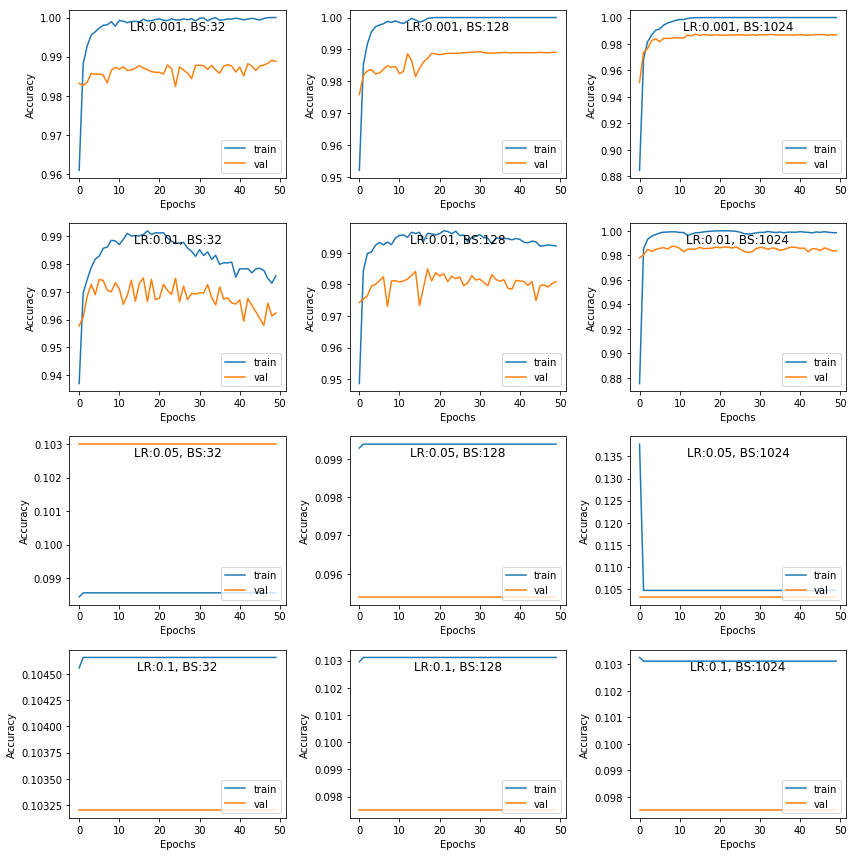

In [11]:
# For l layer CNN
learning_rate = [0.001, 0.01, 0.05, 0.1]
batch_size = [32, 128, 1024]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 12))
for params in grid:
  print("\nLearning_rate: {}, Batch_size: {}".format(params[0], params[1]))
  plt.subplot(4, 3, grid.index(params) + 1)
  model1 = build_model_1(params[0])
  fit_and_evaluate_model(model1, params[0], params[1], epochs = 50)
plt.tight_layout()
plt.show()


Learning_rate: 0.001, Batch_size: 32
Test Accuracy: 0.987

Learning_rate: 0.001, Batch_size: 128
Test Accuracy: 0.992

Learning_rate: 0.001, Batch_size: 1024
Test Accuracy: 0.9908

Learning_rate: 0.01, Batch_size: 32
Test Accuracy: 0.9693

Learning_rate: 0.01, Batch_size: 128
Test Accuracy: 0.9748

Learning_rate: 0.01, Batch_size: 1024
Test Accuracy: 0.9896

Learning_rate: 0.05, Batch_size: 32
Test Accuracy: 0.098

Learning_rate: 0.05, Batch_size: 128
Test Accuracy: 0.101

Learning_rate: 0.05, Batch_size: 1024
Test Accuracy: 0.098

Learning_rate: 0.1, Batch_size: 32
Test Accuracy: 0.0993

Learning_rate: 0.1, Batch_size: 128
Test Accuracy: 0.101

Learning_rate: 0.1, Batch_size: 1024
Test Accuracy: 0.1932


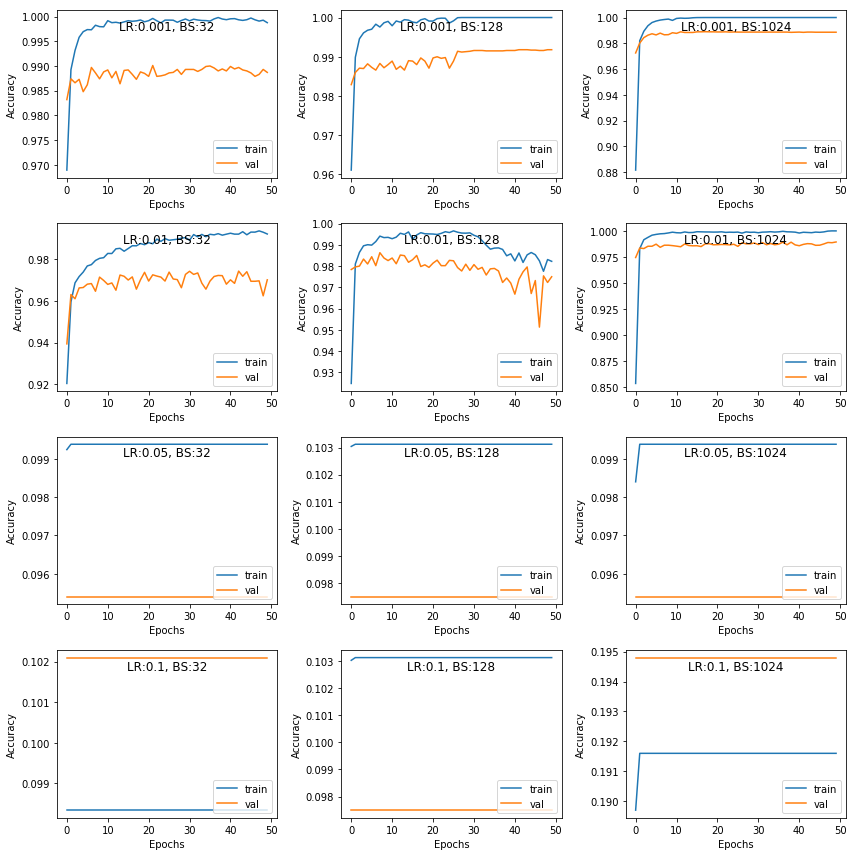

In [13]:
# For 2 layer CNN
learning_rate = [0.001, 0.01, 0.05, 0.1]
batch_size = [32, 128, 1024]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 12))
for params in grid:
  print("\nLearning_rate: {}, Batch_size: {}".format(params[0], params[1]))
  plt.subplot(4, 3, grid.index(params) + 1)
  model2 = build_model_2(params[0])
  fit_and_evaluate_model(model2, params[0], params[1], epochs = 50)
plt.tight_layout()
plt.show()

### Influence of learning rate and batch size on performance(both 1 and 2 layer CNN)
#### 1. Influence on validation accuracy
1. For learning rates = 0.001 and 0.01, high validation accuracy of ~98% is achieved for all selected batch sizes within 10 epochs.
2. For learning rates = 0.001 and 0.01, validation accuracy is noisier for smaller batch sizes of 32 and 128 because of more frequent updates to weights.
3. Learning rates = 0.05 and 0.1 perform poorly. May be they are too high and model starts diverging. The value of ~10% accuracy could be interpreted as if network is uniformly and randomly classifying digits, hence no learning taking place.

#### 2. Influence on test accuracy
1. Learning rates = 0.001 and 0.01 give good test accuracy of ~98%.
2. Learning rates = 0.05 and 0.1 give poor test accuracy of ~10%.

###  Influence of number of layers on performance
1.No significant difference in performance is observed by increasing number of layers as even 1 CONV layer is able to achieve maximum validation and test accuracy. Hence it would be computationally efficient to use smaller model for MNIST dataset.